In [135]:
# Imports
import pandas as pd
import numpy as np
import tifffile as tif
import matplotlib.pyplot as plt
import os, gc, glob
import json 
from shapely import wkt
from PIL import Image


In [25]:
# Load image from directory
dirname = '/Users/kyleheidtbrink/code/kheidtbrink/sat_imagery/raw_data/temp/'  # absolute path
final = []   # list which will contain array of individual tif files
# iterate through the file directory
for fname in os.listdir(dirname):
    print(fname)
    im = Image.open(os.path.join(dirname, fname))
    imarray = np.array(im)
    final.append(imarray)

6080_3_0.tif
6080_3_1.tif
6090_0_1.tif
6090_0_0.tif
6060_2_4.tif
6070_2_3.tif
6060_2_3.tif
6170_1_2.tif
6060_2_2.tif
6070_2_2.tif
6070_2_0.tif
6070_2_1.tif
6110_1_2.tif
6010_0_1.tif
6100_3_0.tif
6100_3_1.tif
6010_0_0.tif
6110_1_1.tif
6010_0_2.tif
6010_0_3.tif
6110_1_0.tif
6010_0_4.tif


In [28]:
# length should be = to the number of files/images in directory
len(final)

22

In [36]:
# explore the shape of the files
array_shape = []
for i in final:
    print(i.shape)
    array_shape.append(i.shape)

(3350, 3339, 3)
(3350, 3339, 3)
(3349, 3393, 3)
(3349, 3393, 3)
(3348, 3400, 3)
(3350, 3338, 3)
(3348, 3403, 3)
(3349, 3393, 3)
(3348, 3403, 3)
(3350, 3338, 3)
(3350, 3338, 3)
(3350, 3338, 3)
(3348, 3396, 3)
(3349, 3396, 3)
(3349, 3391, 3)
(3349, 3391, 3)
(3349, 3396, 3)
(3348, 3396, 3)
(3349, 3396, 3)
(3349, 3396, 3)
(3348, 3396, 3)
(3349, 3393, 3)


In [46]:
# get the min and max values of the shape of the images 
df_shape = pd.DataFrame(array_shape)
df_shape.head(3)


,0,1,2
0,3350,3339,3
1,3350,3339,3
2,3349,3393,3


In [47]:
# get the min and max values of the shape of the images 
df_shape.describe()

,0,1,2
count,22.000000,22.000000,22.0
mean,3349.000000,3380.090909,3.0
std,0.755929,26.354559,0.0
min,3348.000000,3338.000000,3.0
25%,3348.250000,3352.000000,3.0
50%,3349.000000,3393.000000,3.0
75%,3349.750000,3396.000000,3.0
max,3350.000000,3403.000000,3.0


In [53]:
# X shape max
x_max = df_shape[0].max()
x_max

3350

In [136]:
# X shape min
x_min = df_shape[0].min()
x_min

3348

In [58]:
# Y shape max
y_max = df_shape[1].max()
y_max

3403

In [59]:
# y shape min
y_min = df_shape[1].min()
y_min

3338

In [132]:
# reshape the individual images using a using numpy slicing

reshape_image = []
for image in final:
    #print(image)
    reshape_image.append(image[:x_min,:y_min])
  
    
    

In [134]:
# verify the image shapes are equal 
for i in reshape_image:
    print(i.shape)

(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)
(3348, 3338, 3)


## Playing around with data --- Not necessary for work flow or preprocessing

In [137]:
b = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [92]:
b[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [86]:
im6070_2_3 = Image.open('/Users/kyleheidtbrink/code/kheidtbrink/sat_imagery/raw_data/three_band/6070_2_3.tif')
im6070_2_3.show()

In [89]:
type(im6070_2_3)

PIL.TiffImagePlugin.TiffImageFile

(<Figure size 988.8x604.8 with 1 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x11e5fe340>)

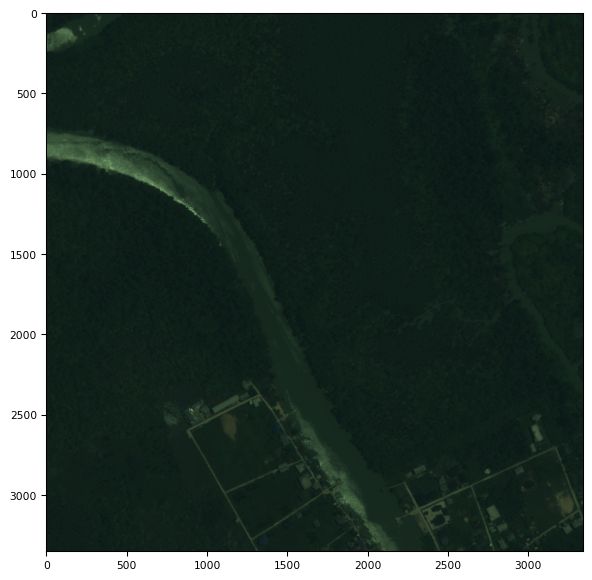

In [3]:
im6070_2_3 = tif.imread('/Users/kyleheidtbrink/code/kheidtbrink/sat_imagery/raw_data/three_band/6070_2_3.tif') 
tif.imshow(im6070_2_3,cmap='gray')

In [4]:
imarray6070_2_3 = np.array(im6070_2_3)

In [7]:
imarray6070_2_3

(3350, 3338)

In [79]:
X_scaled = im6070_2_3/255

In [83]:
X_scaled.shape

(3, 3350, 3338)